##1. 유사도

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

arr = np.array([[1,2,3], [4,5,6]] )
euclidean_distances(arr)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.        , 5.19615242],
       [5.19615242, 0.        ]])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(arr)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1.        , 0.97463185],
       [0.97463185, 1.        ]])

In [ ]:
#MNIST fashion 샘플 데이터
import tensorflow as tf
from sklearn.cluster import KMeans

# 1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#10개의 아이템 범주
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit( test_images.reshape(-1, 28*28) )
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10, 784)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


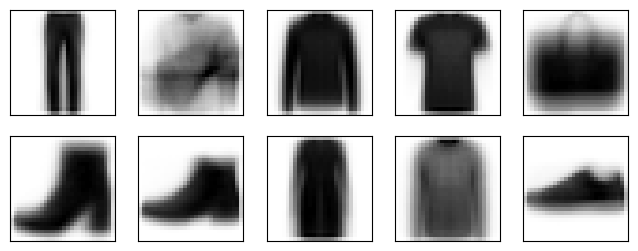

In [ ]:
# 시각화
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))	#10개의 그림을 2행5열로 표시
centers = kmeans.cluster_centers_.reshape(10, 28, 28)	#10개 숫자, 각 그림 픽셀 (8 by 8)로 shape 변경

#표시
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()


##2. 패턴

In [ ]:
#data_3.csv를 읽어보세요

#user인덱스, artist column으로 지정, -> user-artist matrix (groupby, pivot)
import pandas as pd
data = pd.read_csv("data_3.csv")
data.head()
data.user = data.user.astype('str')
data1 = data.pivot_table(index="user",
                 columns="artist",
                 values="qty", aggfunc="sum", fill_value=0).head()


#BX-Book-Ratings.zip
#pivot_table 적용해보세요


In [ ]:
!unzip BX-Book-Ratings.zip

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Archive:  BX-Book-Ratings.zip
  inflating: BX-Book-Ratings.csv     


In [ ]:
import pandas as pd
book = pd.read_csv("BX-Book-Ratings.csv", sep=";")
book.shape
book["User-ID"].nunique()

105283

In [ ]:
book["ISBN"].nunique()

340557

In [ ]:
book["User-ID"]=book["User-ID"].astype("str")
book["ISBN"]=book["ISBN"].astype("str")
book.pivot_table(index="User-ID",
                 columns="ISBN",
                 values="Book-Rating", aggfunc="mean", fill_value=0).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-105-870634102795>:3: PerformanceWarning: The following operation may generate 35853785100 cells in the resulting pandas object.
  book.pivot_table(index="User-ID",



- 지지도(Support)

- 어떤 규칙의 지지도가 10%라면 전체 트랜젝션(트랜잭션은 작업의 완전성 을 보장해주는 것이다) 중 그 규칙을 따르고 있는 트랜젝션이 10%를 차지한다는 의미. 즉, 두 품목 A와 B의 지지도는 전체 거래 항목 중에서 항목 A와 항목 B를 동시에 포함하는 거래의 비율을 의미


$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Support = P(A {\cap} B) $

                          품목 A와 품목 B를 포함하는 거래수 / 전체 거래 수

- 신뢰도(Confidence)

- 항목 A의 거래중에서 항목 B가 포함된 거래의 비율.

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Confidence = P(B | A) = {\dfrac {P(A {\cap} B)}{P(A)}} $

                          지지도(Support) / P(A)

- 향상도(Lift:improvement)

- A ${\rightarrow}$ B 의 연관 규칙에서 임의로(Random) B가 구매되는 경우에 비해 A와의 관계가 고려되어 구매되는 경우의 비율. 즉, 연관 규칙이 오른쪽 항목을 예측하기 위한 능력이 얼마나 향상되었는가를 표현하는 값.

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Lift = {\dfrac{P(B|A)}{P(B)}} = {\dfrac{P(A{\cap}B)}{P(A)P(B)}} $

                          신뢰도(Confidence) / P(B)




In [ ]:
!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def func1( x ):
  if( x<=0.0):
    return False
  else:
    return True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data = pd.read_csv("data_3.csv")
data["user"] = data["user"].astype("str")
data["artist"] = data["artist"].str.strip()
data1 = data.groupby([ "user","artist"])["qty"].sum().unstack().fillna(0).applymap(func1)
data1.head()
#또는
data2 = pd.pivot_table( data, index="user", columns="artist", values="qty", aggfunc="sum", fill_value=0 ).applymap(func1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-aaa6e6f8ae75>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data1 = data.groupby([ "user","artist"])["qty"].sum().unstack().fillna(0).applymap(func1)
<ipython-input-17-aaa6e6f8ae75>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data2 = pd.pivot_table( data, index="user", columns="artist", values="qty", aggfunc="sum", fill_value=0 ).applymap(func1)


In [ ]:
tmp1  = apriori( data1, min_support=0.01, use_colnames=True )
tmp1  = fpgrowth( data1, min_support=0.01, use_colnames=True )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
patterns = association_rules( tmp1, metric='confidence', min_threshold=0.05)
patterns.sort_values(by='lift', ascending=False).head(5)#lift 기준 내림차순

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4093,(the game),(snoop dogg),0.013848,0.024728,0.010880,0.785714,31.774286,0.010538,4.551269,0.982128
4092,(snoop dogg),(the game),0.024728,0.013848,0.010880,0.440000,31.774286,0.010538,1.760986,0.993085
3342,(scooter),(cascada),0.020772,0.020772,0.010880,0.523810,25.217687,0.010449,2.056380,0.980716
3343,(cascada),(scooter),0.020772,0.020772,0.010880,0.523810,25.217687,0.010449,2.056380,0.980716
1524,(armin van buuren),(atb),0.019782,0.024728,0.011869,0.600000,24.264000,0.011380,2.438180,0.978137


In [ ]:
#chipotle.tsv에 대해서 패턴을 발견. (delimiter="\t", header=0)
data = pd.read_csv("chipotle.tsv", delimiter="\t", header=0)
data["order_id"] = data["order_id"].astype("str")
data["item_name"] = data["item_name"].str.strip()
data1 = pd.pivot_table( data, index="order_id", columns="item_name", values="quantity", aggfunc="sum", fill_value=0 ).applymap(func1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-20-2f0e967dd738>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data1 = pd.pivot_table( data, index="order_id", columns="item_name", values="quantity", aggfunc="sum", fill_value=0 ).applymap(func1)


In [ ]:
#tmp1  = apriori( data1, min_support=0.01, use_colnames=True )
tmp1  = fpgrowth( data1, min_support=0.01, use_colnames=True )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
patterns = association_rules( tmp1, metric='confidence', min_threshold=0.05 )
patterns.sort_values(by='lift', ascending=False).head(2)#lift 기준 내림차순

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
82,(Chips),"(Chicken Bowl, Bottled Water)",0.113413,0.037623,0.015267,0.134615,3.578038,0.011,1.112080,0.812687
78,"(Chicken Bowl, Bottled Water)",(Chips),0.037623,0.113413,0.015267,0.405797,3.578038,0.011,1.492061,0.748685


## 3. 추천-협업필터링

### 1. Collaborative Filtering (협업 필터링)
- 추천 시스템: 고객의 선호, 관심, 구매경력과 같은 개인화 정보를 기초로 고객에게 가장 알맞은 구매정보 제공
- 방식
  - Item-based collaborative filtering: item 간 similarity를 기반으로 추천
  - User-based collaborative filtering: user 간 similarity를 기반으로 추천
    - 성능이 다른 방식에 비해 떨어지는 것으로 알려져있음
  - Matrix factorization collaborative filtering: 잠재요인이 있다고 가정하여, 그 잠재요인을 행렬분해를 통해 찾아냄
    - 일반적으로 SVD(singular value decomposition)을 활용

- Input: user-item matrix (preference matrix)
  - 일반적으로 5점 척도로 구성된 rating + cosine similarity
  - binary인 경우 jaccard similarity 사용

- 한계
  - 단순 matrix를 사용하여 추천하기 때문에 context/content를 고려하지 않음
    - 최근에는 item의 text 정보, user의 context 정보들을 반영하여 딥러닝 기반의 추천 시스템 등장

In [ ]:
import pandas as pd
df = pd.read_csv('movies.csv')
df1 = df.pivot_table( index='userId', columns='title', values='rating', fill_value=0)

from sklearn.metrics.pairwise import cosine_similarity
df_sim = cosine_similarity(df1)
df_sim

In [ ]:
df = df.pivot_table('rating', index = 'userId', columns = 'title')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title,10 Things I Hate About You,12 Angry Men,1408,15 Minutes,16 Blocks,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2046,21 Grams,25th Hour,...,Willy Wonka & the Chocolate Factory,World Trade Center,X-Men Origins: Wolverine,Y Tu Mamá También,You Only Live Twice,"You, Me and Dupree",Young Frankenstein,Zodiac,eXistenZ,xXx
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(670, 856)

- user들별로 평점을 주는 범위가 다르기 때문에 scaling하여 조정

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index = df.index)
df_scaled

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title,10 Things I Hate About You,12 Angry Men,1408,15 Minutes,16 Blocks,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2046,21 Grams,25th Hour,...,Willy Wonka & the Chocolate Factory,World Trade Center,X-Men Origins: Wolverine,Y Tu Mamá También,You Only Live Twice,"You, Me and Dupree",Young Frankenstein,Zodiac,eXistenZ,xXx
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.555556,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Item-based collaborative filtering
- Item*user으로 구성된 matrix를 사용하여 유사도 측정

In [ ]:
df_scaled = df_scaled.transpose().fillna(0)
df_scaled.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
15 Minutes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
16 Blocks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


- user들 간 평점이 비슷한 정도를 기반으로 영화들의 유사도 평가

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
movie_sim = cosine_similarity(df_scaled, df_scaled)
print(movie_sim.shape)

(856, 856)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
movie_sim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.08998054,
        0.07767356],
       [0.        , 0.        , 0.        , ..., 0.08998054, 1.        ,
        0.0226314 ],
       [0.        , 0.        , 0.        , ..., 0.07767356, 0.0226314 ,
        1.        ]])

In [ ]:
movie_sim = pd.DataFrame(movie_sim, index = df_scaled.index, columns = df_scaled.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
movie_sim['Sin City'].sort_values(ascending=False)[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sin City
title,
Sin City,1.000000
The Sentinel,0.692308
Freddy vs. Jason,0.667124
Austin Powers in Goldmember,0.240820
The Mummy Returns,0.217571
"Monsters, Inc.",0.208739
Saw IV,0.200063
Dances with Wolves,0.186198
Apocalypse Now,0.176147


###3. Surprise

In [ ]:
!pip install scikit-surprise

In [ ]:
df = pd.read_csv('BX-Book-Ratings.csv', sep=";")
print(df.shape)
#df.query('rating >= 3', inplace=True)
df = df.sample(50000)
df.head()
#df.shape

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [ ]:
#BX-book-rating....데이터에 대해서  UBCF, K=5
#RMSE
from surprise import Reader, Dataset, KNNBasic, SVD
from surprise.model_selection import train_test_split, cross_validate
import pandas as pd

# Prepare the data to be used in Surprise
reader = Reader(rating_scale=(0,10))
data = Dataset.load_from_df(df[['User-ID', 'ISBN', 'Book-Rating']], reader=reader)


In [ ]:
data.raw_ratings

In [ ]:
data.raw_ratings #data.df

In [ ]:
# Retrieve the trainset.
trainset, testset = train_test_split(data)
sim_options = {
    'name': 'cosine',
    'user_based': True
}
algo = KNNBasic(sim_options=sim_options, k=5)
algo.fit(trainset)

# Predict
print(algo.predict(1, 5, r_ui=None, verbose=True))

In [ ]:
prediction = algo.test(testset)
prediction[:5]
from surprise import accuracy
accuracy.rmse(prediction)

- Surprise 지원 알고리즘
 - Random : 랜덤한 추천
 - Matrix factorization: SVD, SVD++
 - KNNs
 - https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html

In [ ]:
from surprise import BaselineOnly
from surprise import KNNWithMeans, KNNBasic, KNNBaseline
from surprise import SVD
from surprise import SVDpp

from surprise import accuracy
from surprise import Dataset
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
trainset, testset = train_test_split(data, test_size = 0.25)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
recom = KNNBasic()  #CF
recom.fit(trainset)
predictions = recom.test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE: 0.6756


0.6755862734051039

In [ ]:
recom = SVD()  #matrix 분해 (SVD) 이용
recom.fit(trainset)
predictions = recom.test(testset)
accuracy.rmse(predictions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE: 0.6412


0.6411928932834833

- ml-100k에 대해서 여러 추천 알고리즘을 수행하고 비교

In [ ]:
# MovieLens 100K
data = Dataset.load_builtin(name='ml-100k', prompt = False)  #ml-1m, jester
trainset, testset = train_test_split(data, test_size = 0.25)

Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [ ]:
algorithms = [KNNBasic, SVD]

algos=[]
rmses=[]

for i in algorithms:
  algo = i()
  algos.append(i.__name__)
  algo.fit(trainset)
  predictions = algo.test(testset)
  rmses.append(accuracy.rmse(predictions))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9788
RMSE: 0.9365


- cross validate

In [ ]:
cross_validate( SVD(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9373  0.9414  0.9369  0.9320  0.9355  0.9366  0.0030  
MAE (testset)     0.7386  0.7423  0.7392  0.7365  0.7377  0.7389  0.0020  
Fit time          6.46    3.39    2.17    1.47    1.84    3.07    1.82    
Test time         1.64    0.23    0.14    0.12    0.21    0.47    0.59    


{'test_rmse': array([0.93725126, 0.94138025, 0.93689965, 0.93199745, 0.93546364]),
 'test_mae': array([0.7385894 , 0.74233418, 0.73917522, 0.73650179, 0.73766507]),
 'fit_time': (6.4646360874176025,
  3.3916969299316406,
  2.1674728393554688,
  1.4740138053894043,
  1.8418638706207275),
 'test_time': (1.643113374710083,
  0.23437190055847168,
  0.13776731491088867,
  0.12373137474060059,
  0.20836257934570312)}

- SVD

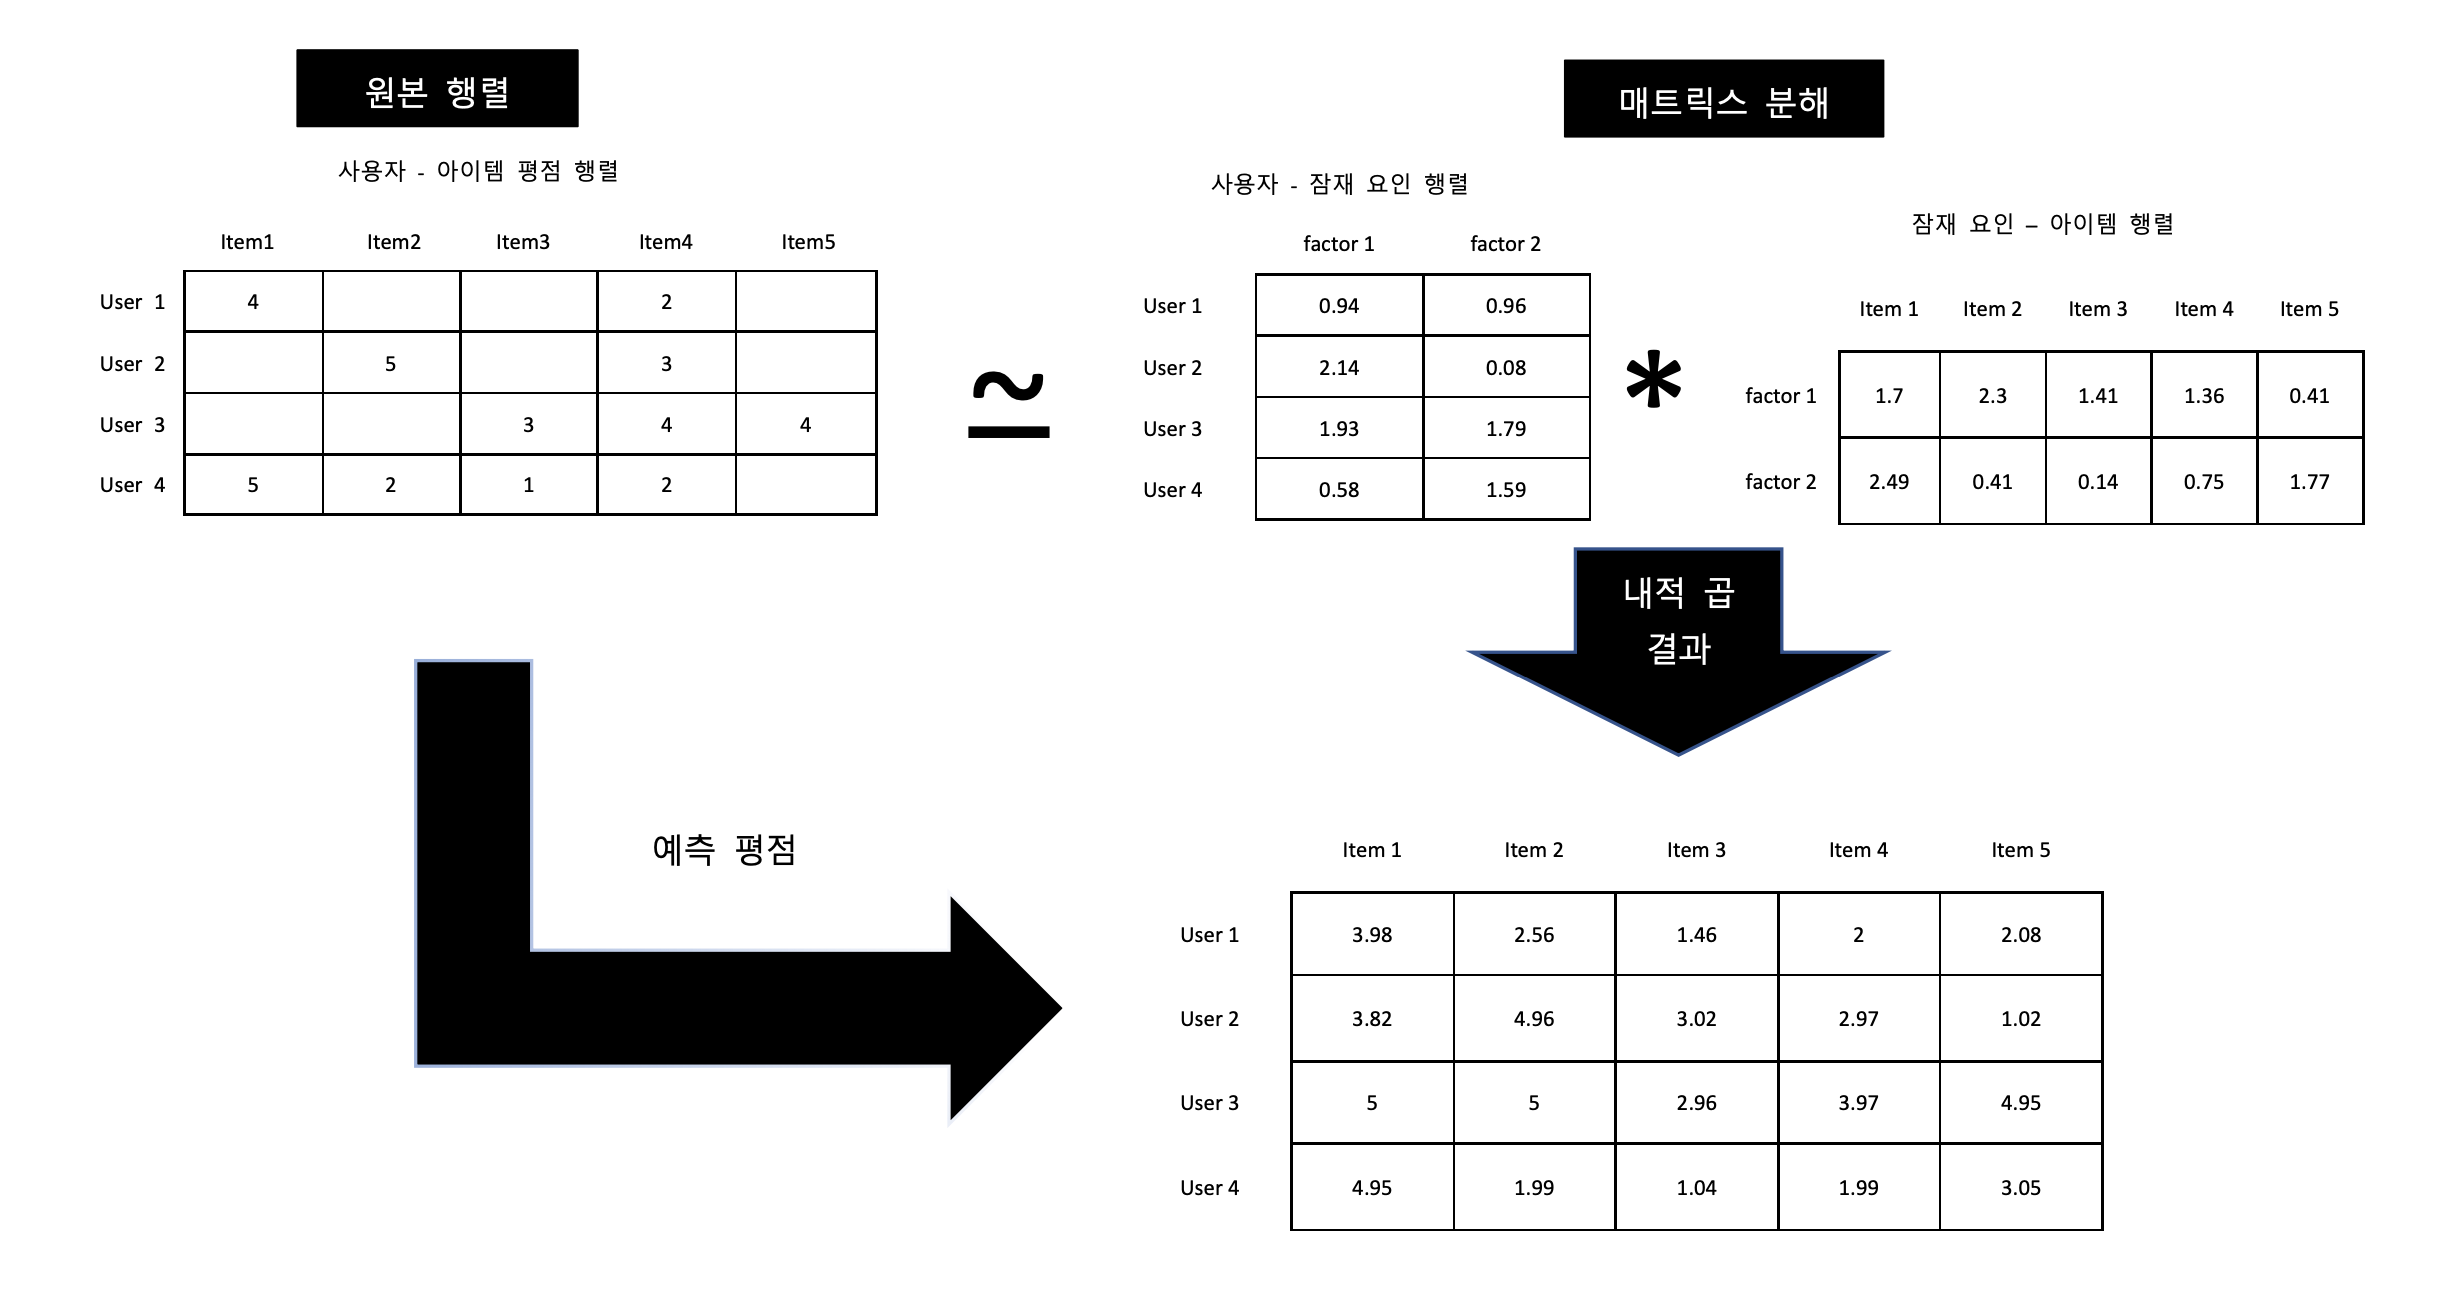

- 잠재 요인 협업 필터링의 행렬 분해 목표는 희소 행렬 형태의 사용자-아이템 평점 행렬을 밀집(Dense) 행렬 형태의 사용자-잠재 요인 행렬과 잠재 요인-아이템 행렬로 분해 한 뒤 이를 재 결합하여 밀집 행렬 형태의 사용자-아이템 평점 행렬을 생성하여, 사용자에게 새로운 아이템을 추천하는 것.

##4.넷플릭스 데이터 실습

- Netflix Movie Recommendation
- 참고:  https://www.kaggle.com/netflix-inc/netflix-prize-data?select=qualifying.txt

In [ ]:
import pandas as pd
import numpy as np
import math
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Reader, Dataset, SVD

'''
According to the documentation, the evaluate() method
was deprecated in version 1.0.5 (functionally replaced
by model_selection.cross_validate()) and was removed in version 1.1.0,
which is likely what you have installed.
'''
# from surprise import evaluate
from surprise.model_selection.validation import cross_validate

sns.set_style("darkgrid")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def readFile(file_path, rows=100000):
    data_dict = {'Cust_Id' : [], 'Movie_Id' : [], 'Rating' : [], 'Date' : []}
    f = open(file_path, "r")
    count = 0
    for line in f:
        count += 1
        if count > rows:
            break

        if ':' in line:
            movidId = line[:-2] # remove the last character ':'
            movieId = int(movidId)
        else:
            customerID, rating, date = line.split(',')
            data_dict['Cust_Id'].append(customerID)
            data_dict['Movie_Id'].append(movieId)
            data_dict['Rating'].append(rating)
            data_dict['Date'].append(date.rstrip("\n"))
    f.close()

    return pd.DataFrame(data_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!unzip combined_data_1.txt.zip

Archive:  combined_data_1.txt.zip
  inflating: combined_data_1.txt     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1 = readFile('combined_data_1.txt', rows=100000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Cust_Id,Movie_Id,Rating,Date
0,1488844,1,3,2005-09-06
1,822109,1,5,2005-05-13
2,885013,1,4,2005-10-19
3,30878,1,4,2005-12-26
4,823519,1,3,2004-05-03


In [ ]:
df1['Rating'] = df1['Rating'].astype(float)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np
df = df1.copy()
df.index = np.arange(0,len(df))
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(99970, 4)

In [ ]:
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Cust_Id,Movie_Id,Rating,Date
0,1488844,1,3.0,2005-09-06
1,822109,1,5.0,2005-05-13
2,885013,1,4.0,2005-10-19
3,30878,1,4.0,2005-12-26
4,823519,1,3.0,2004-05-03
5,893988,1,3.0,2005-11-17
6,124105,1,4.0,2004-08-05
7,1248029,1,3.0,2004-04-22
8,1842128,1,4.0,2004-05-09
9,2238063,1,3.0,2005-05-11


In [ ]:
df['Movie_Id'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Movie_Id,
28,39752
8,14910
18,10722
30,7172
17,7108
26,5861
16,2699
3,2012
24,1333


In [ ]:
df_title = pd.read_csv('movie_titles_utf8.csv', header = None)
df_title = df_title.iloc[:, 0:3]
df_title.columns = ['Movie_Id', 'Year', 'Name']
df_title.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
6,7,1992.0,8 Man
7,8,2004.0,What the #$*! Do We Know!?
8,9,1991.0,Class of Nuke 'Em High 2
9,10,2001.0,Fighter


In [ ]:
reader = Reader()

data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']], reader)
svd = SVD()
# Run 5-fold cross-validation and print results
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0530  1.0510  1.0540  1.0554  1.0434  1.0514  0.0042  
MAE (testset)     0.8365  0.8350  0.8395  0.8341  0.8295  0.8349  0.0033  
Fit time          1.68    1.78    2.48    3.06    1.84    2.17    0.53    
Test time         0.19    0.11    0.20    0.11    0.16    0.16    0.04    


{'test_rmse': array([1.05295896, 1.05100317, 1.05399125, 1.05540849, 1.0433962 ]),
 'test_mae': array([0.83645485, 0.83499285, 0.83946917, 0.83411989, 0.82948647]),
 'fit_time': (1.6819863319396973,
  1.7780003547668457,
  2.4768340587615967,
  3.06312894821167,
  1.842318058013916),
 'test_time': (0.19335508346557617,
  0.10758638381958008,
  0.20371770858764648,
  0.11314964294433594,
  0.16015934944152832)}

In [ ]:
df_822109 = df[(df['Cust_Id'] == '822109') & (df['Rating'] >= 4)]
df_822109 = df_822109.set_index('Movie_Id')
df_822109 = df_822109.join(df_title)['Name']
df_822109.head(df_822109.shape[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Name
Movie_Id,
1,Isle of Man TT 2004 Review


In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
titles = df_title.copy()

titles['Estimate_Score'] = titles['Movie_Id'].apply(lambda x: svd.predict(785314, x).est)
titles = titles.sort_values(by=['Estimate_Score'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
titles.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Movie_Id,Year,Name,Estimate_Score
12,13,2003.0,Lord of the Rings: The Return of the King: Ext...,4.485089
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.994863
4,5,2004.0,The Rise and Fall of ECW,3.946266
27,28,2002.0,Lilo and Stitch,3.846162
0,1,2003.0,Dinosaur Planet,3.790137
17,18,1994.0,Immortal Beloved,3.739878
29,30,2003.0,Something's Gotta Give,3.701612
2,3,1997.0,Character,3.693837
28,29,2001.0,Boycott,3.670402
1,2,2004.0,Isle of Man TT 2004 Review,3.663431


##5. 콘텐츠 기반 추천

- 컨텐츠(item)들을 벡터 형태로 표현: 이미지, 텍스트 등
- 텍스트와 같은 자연어는 TF-IDF, Word2Vec 등과 같은 기법을 사용, 이미지는 CNN과 같은 모델을 사용
 - 예: 카카오 페이지의 소설책과 같은 경우는 표지의 이미지는 CNN 계열의 모델을 사용하고 내용물은 자연어 처리 모델을 같이 사용해서 결합
- 컨텐츠(item)들을 벡터로 표현하고, 벡터간의 유사도를 계산

#### 콘텐츠에 대한 유사도 예

In [ ]:
docs = [
  '먹고 싶은 사과', # 문서0
  '먹고 싶은 바나나', # 문서1
  '길고 노란 바나나 바나나', # 문서2
  '저는 과일이 좋아요' # 문서3
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer() # Counter Vectorizer 객체 생성

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 문장을 Counter Vectorizer 형태로 변형
countvect = vect.fit_transform(docs)
countvect # 4x9 : 4개의 문서에 9개의 단어

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [ ]:
# toarray()를 통해서 문장이 Vector 형태의 값을 얻을 수 있음
# 하지만, 각 인덱스와 컬럼이 무엇을 의미하는지에 대해서는 알 수가 없음
countvect.toarray()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1]])

In [ ]:
vect.vocabulary_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'먹고': 3,
 '싶은': 6,
 '사과': 5,
 '바나나': 4,
 '길고': 1,
 '노란': 2,
 '저는': 7,
 '과일이': 0,
 '좋아요': 8}

In [ ]:
sorted(vect.vocabulary_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [ ]:
import pandas as pd
countvect_df = pd.DataFrame(countvect.toarray(), columns = sorted(vect.vocabulary_))
countvect_df.index = ['문서1', '문서2', '문서3', '문서4']
countvect_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
문서1,0,0,0,1,0,1,1,0,0
문서2,0,0,0,1,1,0,1,0,0
문서3,0,1,1,0,2,0,0,0,0
문서4,1,0,0,0,0,0,0,1,1


In [ ]:
# 위의 Data Frame 형태의 유사도를 계산
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(countvect_df, countvect_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1.        , 0.66666667, 0.        , 0.        ],
       [0.66666667, 1.        , 0.47140452, 0.        ],
       [0.        , 0.47140452, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
tfvect = vect.fit(docs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tfidv_df = pd.DataFrame(tfvect.transform(docs).toarray(), columns = sorted(vect.vocabulary_))
tfidv_df.index = ['문서1', '문서2', '문서3', '문서4']
tfidv_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
문서1,0.00000,0.00000,0.00000,0.526405,0.00000,0.667679,0.526405,0.00000,0.00000
문서2,0.00000,0.00000,0.00000,0.577350,0.57735,0.000000,0.577350,0.00000,0.00000
문서3,0.00000,0.47212,0.47212,0.000000,0.74445,0.000000,0.000000,0.00000,0.00000
문서4,0.57735,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.57735,0.57735


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidv_df, tfidv_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1.        , 0.60784064, 0.        , 0.        ],
       [0.60784064, 1.        , 0.42980824, 0.        ],
       [0.        , 0.42980824, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

- `max_features`: 가장 많이 나온 단어 n 개만 사용

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=4)
tfvect = vect.fit(docs)

tfidv_df = pd.DataFrame(tfvect.transform(docs).toarray(), columns = sorted(vect.vocabulary_))
tfidv_df.index = ['문서1', '문서2', '문서3', '문서4']
tfidv_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,과일이,먹고,바나나,싶은
문서1,0.0,0.707107,0.00000,0.707107
문서2,0.0,0.577350,0.57735,0.577350
문서3,0.0,0.000000,1.00000,0.000000
문서4,1.0,0.000000,0.00000,0.000000


#### 2. Transformer 활용
- Embedding: 아이템 등을 벡터로 표현, 쿼리와 아이템에 대한 임베딩 많이 사용됨
- Content based Filtering: 아이템 간 유사도 기반
- Collaborative Filtering: 쿼리와 아이템의 유사도 활용

In [1]:
!unzip netflix_titles.csv.zip

Archive:  netflix_titles.csv.zip
  inflating: netflix_titles.csv      


In [2]:
import numpy as np
import pandas as pd
import missingno
netflix_data = pd.read_csv('netflix_titles.csv')
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<Axes: >

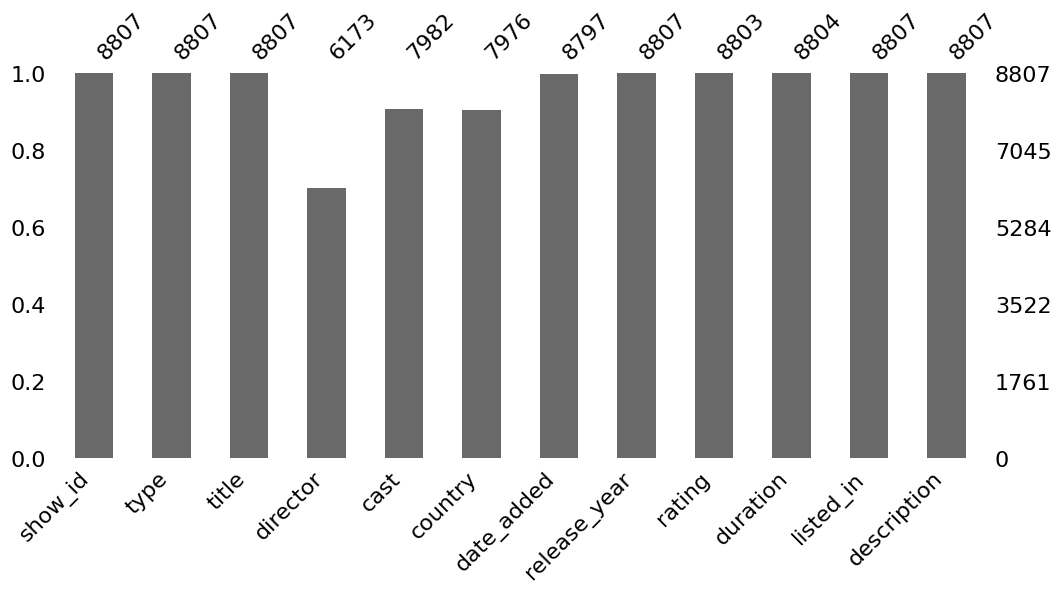

In [3]:
missingno.bar(netflix_data,figsize=(12,5))

In [4]:
netflix_data['director'].value_counts()

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
...,...
"Raymie Muzquiz, Stu Livingston",1
Joe Menendez,1
Eric Bross,1


In [5]:
netflix_data['cast']

,cast
0,NaN
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,NaN
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
...,...
8802,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8803,NaN
8804,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf.fit_transform(netflix_data['description'][0:10]).toarray().shape

(10, 182)

In [19]:
from sklearn.metrics.pairwise import linear_kernel

tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), stop_words='english')
tfidf_matrix = tf.fit_transform(netflix_data['description'][0:10])
tfidf_matrix.toarray().shape

(10, 407)

In [25]:
#Movie, 2021 컨텐츠에 대해서 description에 대한 유사도
n1 = netflix_data.query("type=='Movie' and release_year==2021")

#tfidf 사용, Intrusion에 대한 코사인 유사도 높은 상위 5개 영화를 찾아보세요.
tf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tf.fit_transform(n1['description'])
from sklearn.metrics.pairwise import cosine_similarity
sim_mat = cosine_similarity( tfidf_matrix.toarray())

In [ ]:
sim_df = pd.DataFrame( sim_mat, columns=n1['title'], index=n1['title'])
sim_df["Intrusion"].sort_values(ascending=False)[1:6]

- Cosine Similarity: 문서들의 Tf-idf 벡터 기반

In [7]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
results = {}
for idx, row in netflix_data.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], netflix_data['show_id'][i]) for i in similar_indices]
    results[row['show_id']] = similar_items[1:]

In [8]:
def item(id):
    return netflix_data.loc[netflix_data['show_id'] == id]['title'].tolist()[0].split(' - ')[0]

# Just reads the results out of the dictionary.def
def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")
    print("-------")
    recs = results[item_id][:num]
    for rec in recs:
        print("Recommended: " + item(rec[1]) + " (score:" +      str(rec[0]) + ")")

In [9]:
recommend('s1305',6)

Recommending 6 products similar to Animals on the Loose: A You vs. Wild Movie...
-------
Recommended: You vs. Wild (score:0.09073680011826209)
Recommended: Man vs Wild with Sunny Leone (score:0.08601513298456359)
Recommended: 40 Sticks (score:0.058130066195245654)
Recommended: Headspace: Unwind Your Mind (score:0.05744985830847706)
Recommended: Captain Underpants Epic Choice-o-Rama (score:0.05686586934355088)
Recommended: The Boss Baby: Get That Baby! (score:0.05588214528282953)


- 벡터 표현을 Transformer로 부터 활용
 - BERT / RoBERTa / XLM-RoBERTa etc.

In [10]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.2.1
    Uninstalling sentence-transformers-3.2.1:
      Successfully uninstalled sentence-transformers-3.2.1


- SentenceTransformer('paraphrase-distilroberta-base-v1')
 - 모형: DistilBERT-base-uncased model fine tuned on a large dataset of paraphrase sentences

In [11]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-distilroberta-base-v1')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.78k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [12]:
import numpy as np
descriptions = netflix_data['description'].tolist()
# print(descriptions)
des_embeddings = []
for i,des in enumerate(descriptions):
    des_embeddings.append(model.encode(des))

In [13]:
#import numpy as np
#des_embeddings = np.load('descriptions_embeddings.npy')

In [14]:
import torch
from sentence_transformers import SentenceTransformer, util

def recommend(query):
    #Compute cosine-similarities with all embeddings
    query_embedd = model.encode(query)
    cosine_scores = util.pytorch_cos_sim(query_embedd, des_embeddings)
    top5_matches = torch.argsort(cosine_scores, dim=-1, descending=True).tolist()[0][1:6]
    return top5_matches

id = 's1305'
query_show_des = netflix_data.loc[netflix_data['show_id'] == id]['description'].to_list()[0]
recommendded_results = recommend(query_show_des)

for index in recommendded_results:
    print(netflix_data.iloc[index,:])

show_id                                                     s8531
type                                                        Movie
title                                      The Tigers of Scotland
director                                             Leanne Gater
cast                                                    Iain Glen
country                                            United Kingdom
date_added                                       November 1, 2018
release_year                                                 2017
rating                                                       TV-G
duration                                                   58 min
listed_in                                           Documentaries
description     This documentary highlights the endangered exi...
Name: 8530, dtype: object
show_id                                                     s3932
type                                                      TV Show
title                                             

/usr/local/lib/python3.10/dist-packages/sentence_transformers/util.py:44: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  a = torch.tensor(a)


- 참고: TMDB 5000 (https://www.kaggle.com/tmdb/tmdb-movie-metadata)
